#### If you like my work , plz do upvote and leave your doubt to comment :)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### About the Data
1> Majority of Columns have Imbalanced data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import scipy.stats as stat

In [4]:
loan_data = pd.read_csv("train.csv")

### Getting General Info about Data

In [5]:
loan_data.shape

(614, 13)

In [6]:
# Getting the head of the data
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Type of each column
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

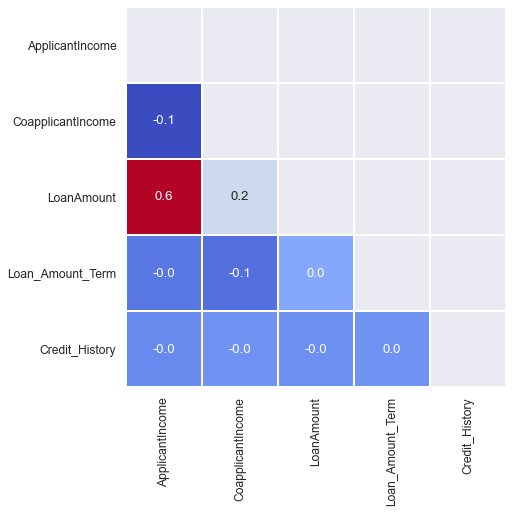

In [9]:
sns.set(font_scale=1.1)
correlation_train = loan_data.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 7))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

### Loan ID

In [10]:
# No duplicates present
len(loan_data["Loan_ID"].unique())

614

### Loan Status (target)
#Imbalanced

In [11]:
loan_data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [12]:
loan_data["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

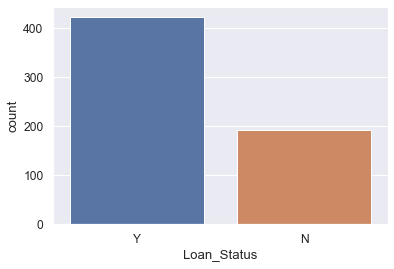

In [13]:
sns.countplot(loan_data["Loan_Status"])

### Gender
#Imbalanced

In [14]:
loan_data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
loan_data["Gender"].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

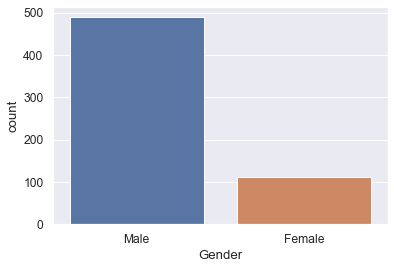

In [16]:
sns.countplot(loan_data["Gender"])

I will be plotting graph similar to below in many occasion of my EDA, so let me give you a brief description

Left Graph:
    It essentially says: given two seperate data about people who got the loan vs who didn't, then what is the gender 
    difference in each of two set.
Right Graph:
        It says: given two sets one about people who are male vs who are female, then what is the accepted vs rejected         difference in each of two set.
        
In this loan dataset majority of times Left graph does not provide right information because of imbalanced data.

IF you get problem in interpreting the two graph then i have also provided numerical representation of both the graph which give a better view of the data, and even if you didn't understand the graph or it's numerical form you can jus skip the left graph and its numerical form and follow with just right graph and its numerical form.

Remember: Above description apply for all other graphs plotted in this notebook.

<AxesSubplot:xlabel='Gender', ylabel='count'>

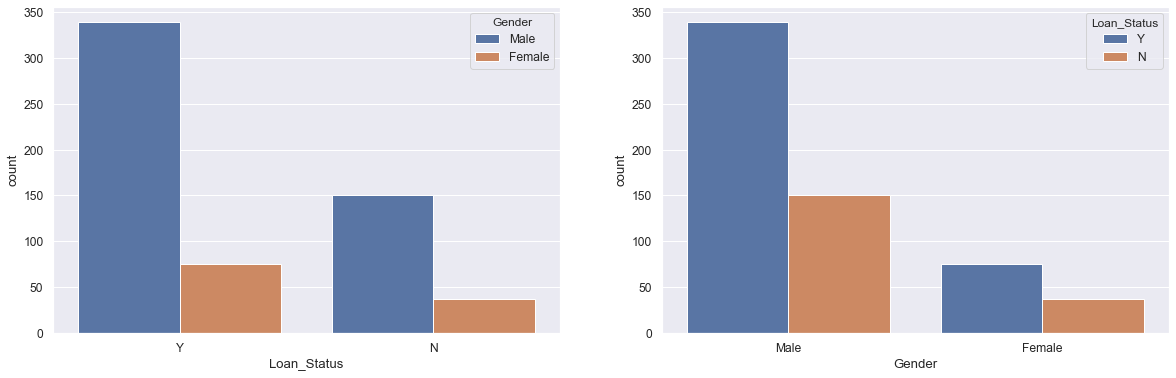

In [17]:
# Relation between Gender and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(loan_data["Loan_Status"], hue=loan_data["Gender"], ax=ax[0])
sns.countplot(loan_data["Gender"], hue=loan_data["Loan_Status"], ax=ax[1])

In [18]:
# Numerical form of Left Graph
loan_data.groupby(by="Loan_Status")["Gender"].value_counts(normalize=True)

Loan_Status  Gender
N            Male      0.802139
             Female    0.197861
Y            Male      0.818841
             Female    0.181159
Name: Gender, dtype: float64

In [19]:
# Numerical form of Right Graph
loan_data.groupby(by="Gender")["Loan_Status"].value_counts(normalize=True)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

### Married
#Imbalanced

In [20]:
loan_data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
loan_data["Married"].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

<AxesSubplot:xlabel='Married', ylabel='count'>

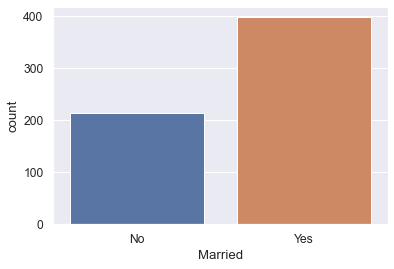

In [22]:
sns.countplot(loan_data["Married"])

<AxesSubplot:xlabel='Married', ylabel='count'>

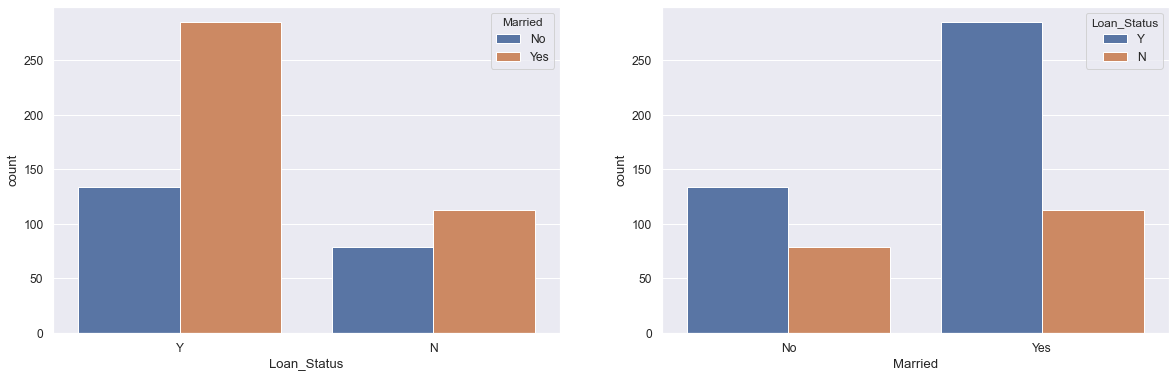

In [23]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(loan_data["Loan_Status"], hue=loan_data["Married"], ax=ax[0])
sns.countplot(loan_data["Married"], hue=loan_data["Loan_Status"], ax=ax[1])

In [24]:
# Numerical form of Left Graph
loan_data.groupby(by="Loan_Status")["Married"].value_counts(normalize=True)

Loan_Status  Married
N            Yes        0.588542
             No         0.411458
Y            Yes        0.680191
             No         0.319809
Name: Married, dtype: float64

In [25]:
# Numerical form of Right Graph
loan_data.groupby(by="Married")["Loan_Status"].value_counts(normalize=True)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: Loan_Status, dtype: float64

It seems like there is 10% higher chance of getting loan when a candidate is married.

### Dependents

In [26]:
loan_data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [27]:
loan_data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

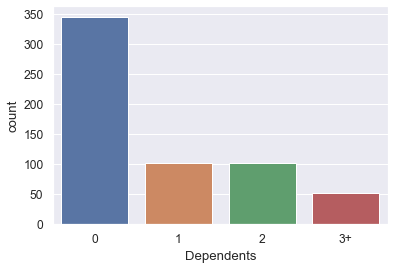

In [28]:
sns.countplot(loan_data["Dependents"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

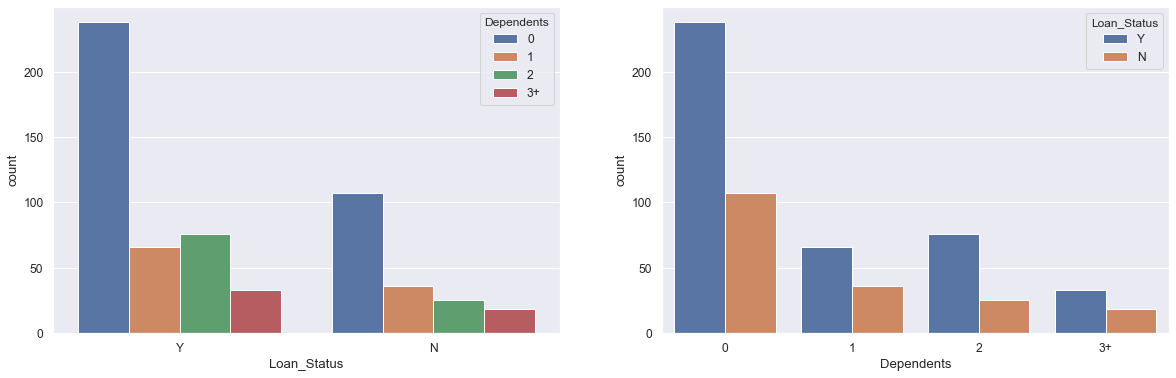

In [29]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(loan_data["Loan_Status"], hue=loan_data["Dependents"], ax=ax[0])
sns.countplot(loan_data["Dependents"], hue=loan_data["Loan_Status"], ax=ax[1])

In [30]:
loan_data.groupby(by="Dependents")["Loan_Status"].value_counts(normalize=True)

Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: Loan_Status, dtype: float64

### Education
#Imbalanced

In [31]:
loan_data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [32]:
loan_data["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

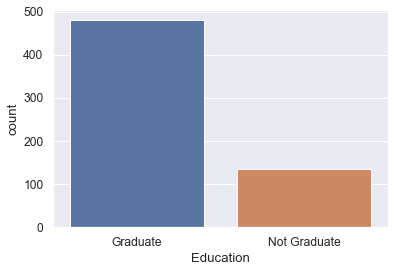

In [33]:
sns.countplot(loan_data["Education"])

<AxesSubplot:xlabel='Education', ylabel='count'>

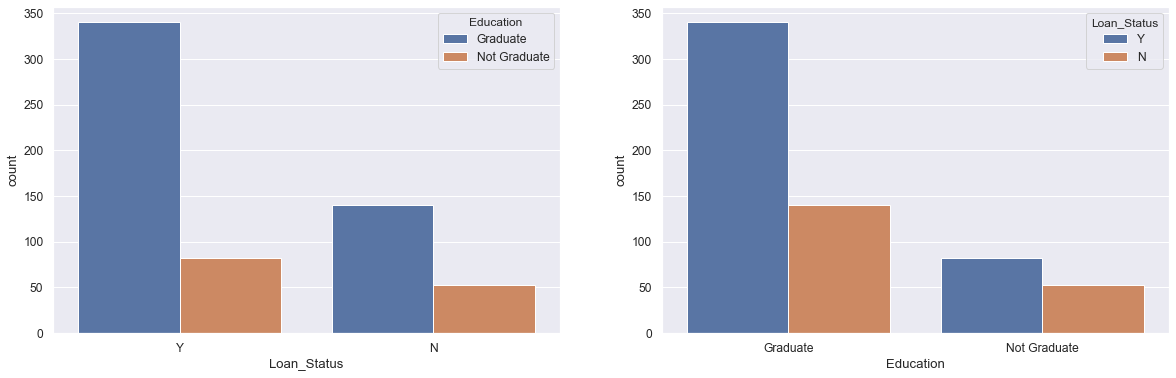

In [34]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(loan_data["Loan_Status"], hue=loan_data["Education"], ax=ax[0])
sns.countplot(loan_data["Education"], hue=loan_data["Loan_Status"], ax=ax[1])

In [35]:
loan_data.groupby(by="Education")["Loan_Status"].value_counts(normalize=True)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: Loan_Status, dtype: float64

In [36]:
loan_data.groupby(by="Loan_Status")["Education"].value_counts(normalize=True)

Loan_Status  Education   
N            Graduate        0.729167
             Not Graduate    0.270833
Y            Graduate        0.805687
             Not Graduate    0.194313
Name: Education, dtype: float64

According to the graph we may be tempted to say that there is a large significance between Education and Loan Status
but when looked using numerical percpective we conclude that there is only about 10% increase in chance of getting Loan if you are graduate.

### Self Employed
#Highly Imbalanced

In [37]:
loan_data["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [38]:
loan_data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

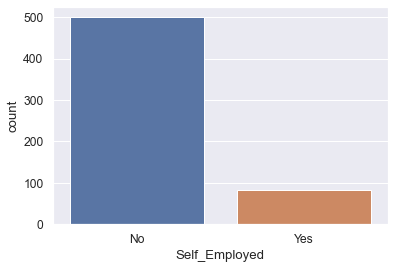

In [39]:
sns.countplot(loan_data["Self_Employed"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

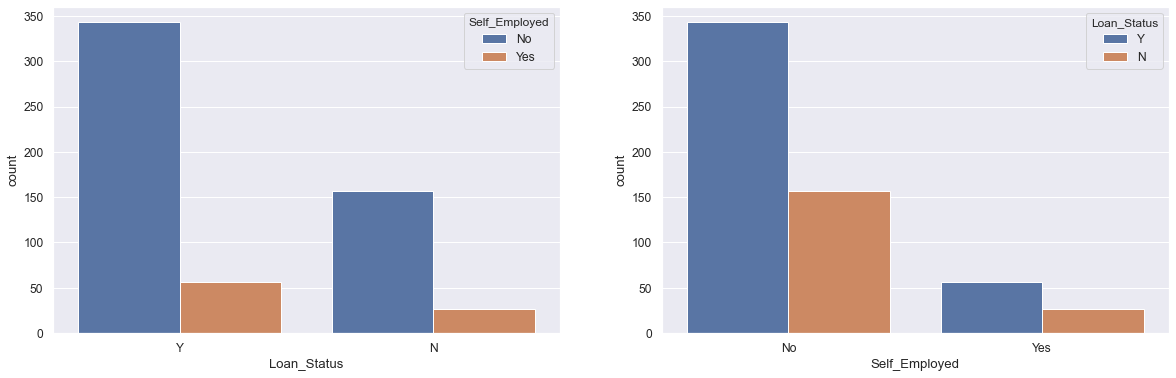

In [40]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(loan_data["Loan_Status"], hue=loan_data["Self_Employed"], ax=ax[0])
sns.countplot(loan_data["Self_Employed"], hue=loan_data["Loan_Status"], ax=ax[1])

In [41]:
loan_data.groupby(by="Self_Employed")["Loan_Status"].value_counts(normalize=True)

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: Loan_Status, dtype: float64

In [42]:
loan_data.groupby(by="Loan_Status")["Self_Employed"].value_counts(normalize=True)

Loan_Status  Self_Employed
N            No               0.857923
             Yes              0.142077
Y            No               0.859649
             Yes              0.140351
Name: Self_Employed, dtype: float64

### Applicant Income

In [43]:
loan_data["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='ApplicantIncome'>

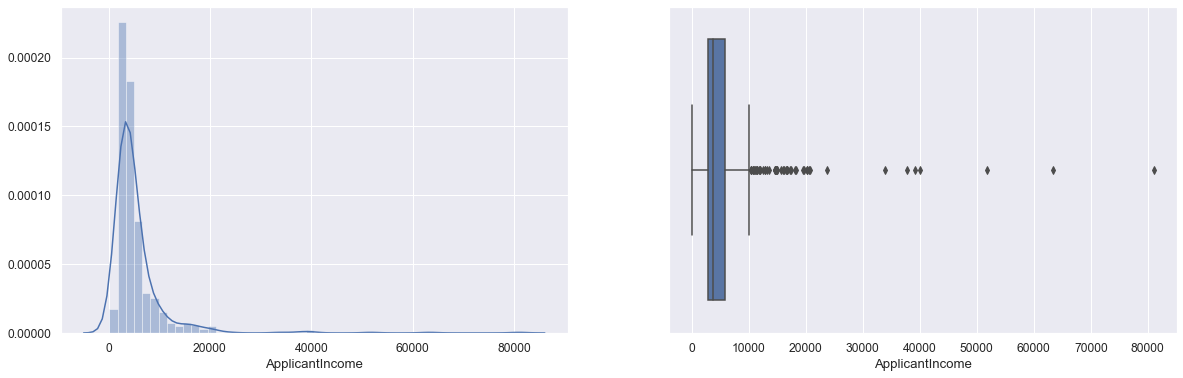

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.distplot(loan_data["ApplicantIncome"], bins=50, ax=ax[0])
sns.boxplot(loan_data["ApplicantIncome"], ax=ax[1])

In [45]:
# Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a 
# normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme 
# values.

In [46]:
print("Skewness :  ", stat.skew(loan_data["ApplicantIncome"]))
print("Kurtosis :  ", stat.kurtosis(loan_data["ApplicantIncome"]))

Skewness :   6.523526250899361
Kurtosis :   60.0390403937373


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

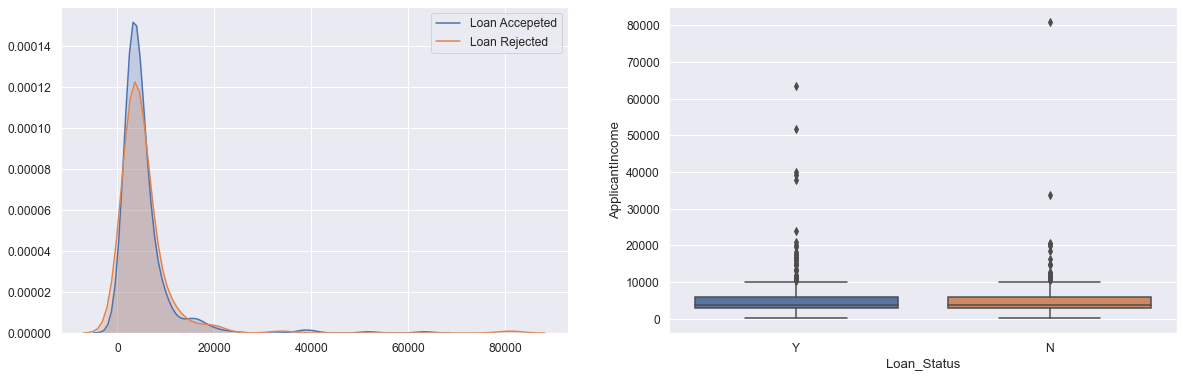

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.kdeplot(loan_data[loan_data["Loan_Status"] == "Y"]["ApplicantIncome"], shade=True,label="Loan Accepeted",ax=ax[0])
sns.kdeplot(loan_data[loan_data["Loan_Status"] == "N"]["ApplicantIncome"], shade=True,label="Loan Rejected",ax=ax[0])
sns.boxplot(y=loan_data["ApplicantIncome"], x=loan_data["Loan_Status"])

In [48]:
print("Loan Accepted")
print("Skewness :  ", stat.skew(loan_data[loan_data["Loan_Status"] == 'Y']["ApplicantIncome"]))
print("Kurtosis :  ", stat.kurtosis(loan_data[loan_data["Loan_Status"] == 'Y']["ApplicantIncome"]))
print("*"*60)
print("Loan Rejected")
print("Skewness :  ", stat.skew(loan_data[loan_data["Loan_Status"] == 'N']["ApplicantIncome"]))
print("Kurtosis :  ", stat.kurtosis(loan_data[loan_data["Loan_Status"] == 'N']["ApplicantIncome"]))

Loan Accepted
Skewness :   5.481184831861423
Kurtosis :   40.59377523171102
************************************************************
Loan Rejected
Skewness :   7.761645103405754
Kurtosis :   78.41679891176025


In [49]:
# Numerical Representation
print(loan_data.groupby("Loan_Status")["ApplicantIncome"].describe())

             count         mean          std    min     25%     50%      75%  \
Loan_Status                                                                    
N            192.0  5446.078125  6819.558528  150.0  2885.0  3833.5  5861.25   
Y            422.0  5384.068720  5765.441615  210.0  2877.5  3812.5  5771.50   

                 max  
Loan_Status           
N            81000.0  
Y            63337.0  


### Co-applicant Income

In [50]:
loan_data["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

<AxesSubplot:xlabel='CoapplicantIncome'>

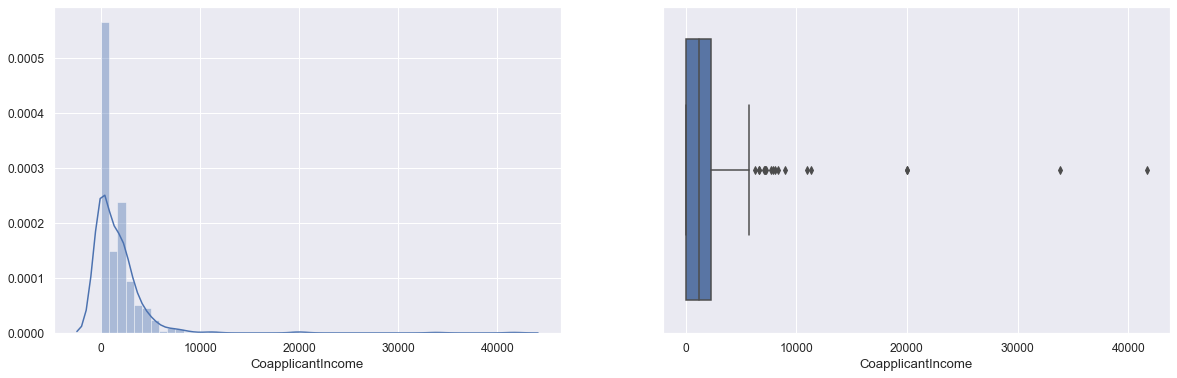

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.distplot(loan_data["CoapplicantIncome"], bins=50, ax=ax[0])
sns.boxplot(loan_data["CoapplicantIncome"], ax=ax[1])

In [52]:
print("Skewness :  ", stat.skew(loan_data["CoapplicantIncome"]))
print("Kurtosis :  ", stat.kurtosis(loan_data["CoapplicantIncome"]))

Skewness :   7.473216996340462
Kurtosis :   84.25637650578992


<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

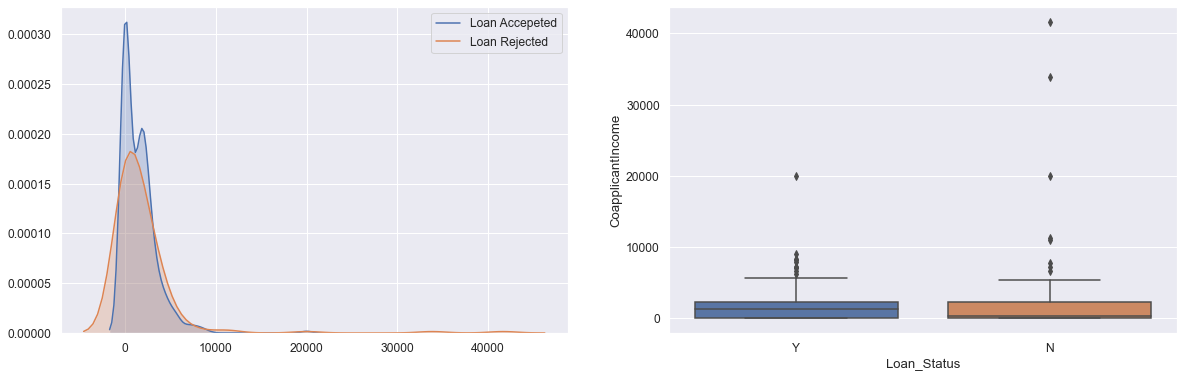

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.kdeplot(loan_data[loan_data["Loan_Status"] == "Y"]["CoapplicantIncome"], shade=True,label="Loan Accepeted",ax=ax[0])
sns.kdeplot(loan_data[loan_data["Loan_Status"] == "N"]["CoapplicantIncome"], shade=True,label="Loan Rejected",ax=ax[0])
sns.boxplot(y=loan_data["CoapplicantIncome"], x=loan_data["Loan_Status"])

In [54]:
# Numerical Representation
print(loan_data.groupby("Loan_Status")["CoapplicantIncome"].describe())

             count         mean          std  min  25%     50%      75%  \
Loan_Status                                                               
N            192.0  1877.807292  4384.060103  0.0  0.0   268.0  2273.75   
Y            422.0  1504.516398  1924.754855  0.0  0.0  1239.5  2297.25   

                 max  
Loan_Status           
N            41667.0  
Y            20000.0  


In [79]:
len(loan_data["CoapplicantIncome"].unique())

287

### Loan Amount

In [55]:
loan_data["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='LoanAmount'>

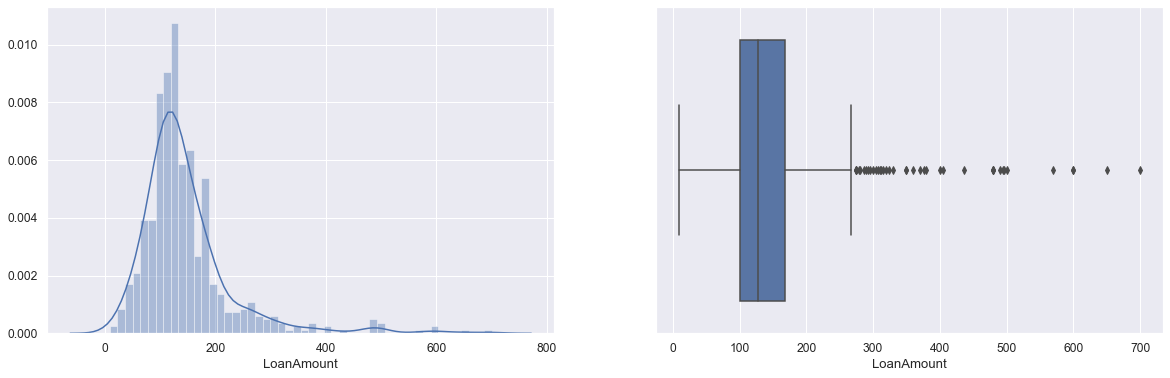

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.distplot(loan_data["LoanAmount"], bins=50, ax=ax[0])
sns.boxplot(loan_data["LoanAmount"], ax=ax[1])

In [57]:
print("Skewness :  ", stat.skew(loan_data.dropna()["LoanAmount"]))
print("Kurtosis :  ", stat.kurtosis(loan_data.dropna()["LoanAmount"]))

Skewness :   2.3540509424728953
Kurtosis :   8.401937052352395


<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

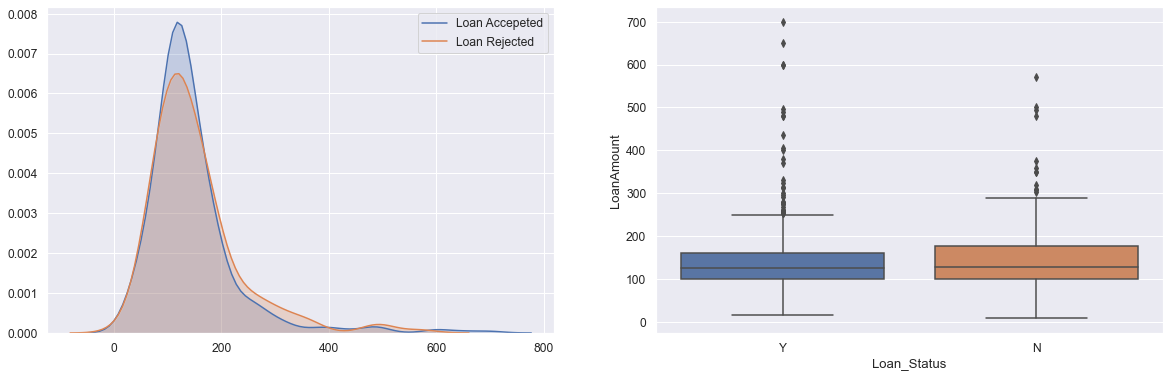

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.kdeplot(loan_data[loan_data["Loan_Status"] == "Y"]["LoanAmount"], shade=True,label="Loan Accepeted",ax=ax[0])
sns.kdeplot(loan_data[loan_data["Loan_Status"] == "N"]["LoanAmount"], shade=True,label="Loan Rejected",ax=ax[0])
sns.boxplot(y=loan_data["LoanAmount"], x=loan_data["Loan_Status"])

In [59]:
# Numerical Representation
print(loan_data.groupby("Loan_Status")["LoanAmount"].describe())

             count        mean        std   min    25%    50%    75%    max
Loan_Status                                                                
N            181.0  151.220994  85.862783   9.0  100.0  129.0  176.0  570.0
Y            411.0  144.294404  85.484607  17.0  100.0  126.0  161.0  700.0


### Loan Amount Term

In [60]:
# Loan Amount Term can be treated as both Categorical as well as Numerical

In [61]:
loan_data["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [62]:
loan_data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

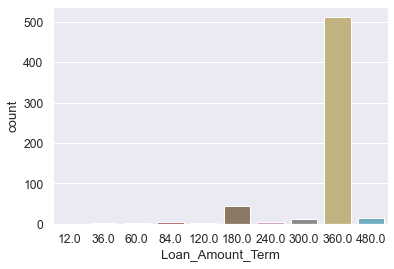

In [63]:
sns.countplot(loan_data["Loan_Amount_Term"])

In [64]:
loan_data.groupby("Loan_Amount_Term")["Loan_Status"].value_counts(normalize=False)

Loan_Amount_Term  Loan_Status
12.0              Y                1
36.0              N                2
60.0              Y                2
84.0              Y                3
                  N                1
120.0             Y                3
180.0             Y               29
                  N               15
240.0             Y                3
                  N                1
300.0             Y                8
                  N                5
360.0             Y              359
                  N              153
480.0             N                9
                  Y                6
Name: Loan_Status, dtype: int64

### Credit History
#Imbalanced

In [65]:
loan_data["Credit_History"].unique()

array([ 1.,  0., nan])

In [66]:
loan_data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

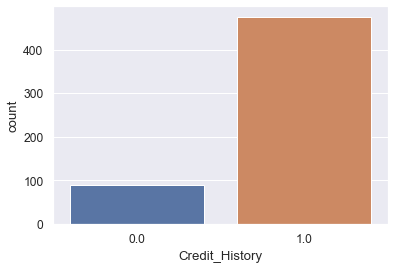

In [67]:
sns.countplot(loan_data["Credit_History"])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

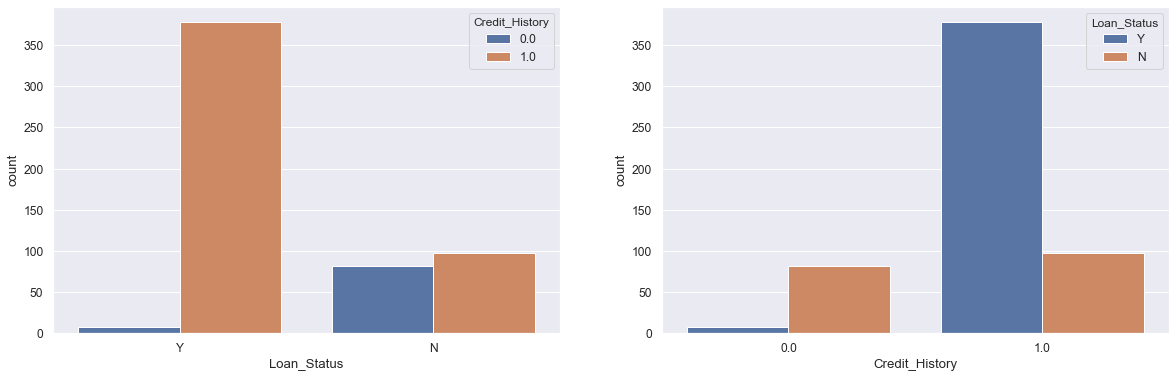

In [68]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(loan_data["Loan_Status"], hue=loan_data["Credit_History"], ax=ax[0])
sns.countplot(loan_data["Credit_History"], hue=loan_data["Loan_Status"], ax=ax[1])

In [69]:
loan_data.groupby("Loan_Status")["Credit_History"].value_counts(normalize=True)

Loan_Status  Credit_History
N            1.0               0.541899
             0.0               0.458101
Y            1.0               0.981818
             0.0               0.018182
Name: Credit_History, dtype: float64

In [70]:
loan_data.groupby("Credit_History")["Loan_Status"].value_counts(normalize=True)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

### Property Area

In [71]:
loan_data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [72]:
loan_data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

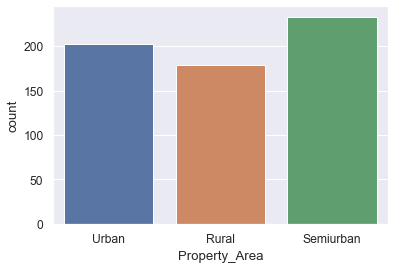

In [73]:
sns.countplot(loan_data["Property_Area"])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

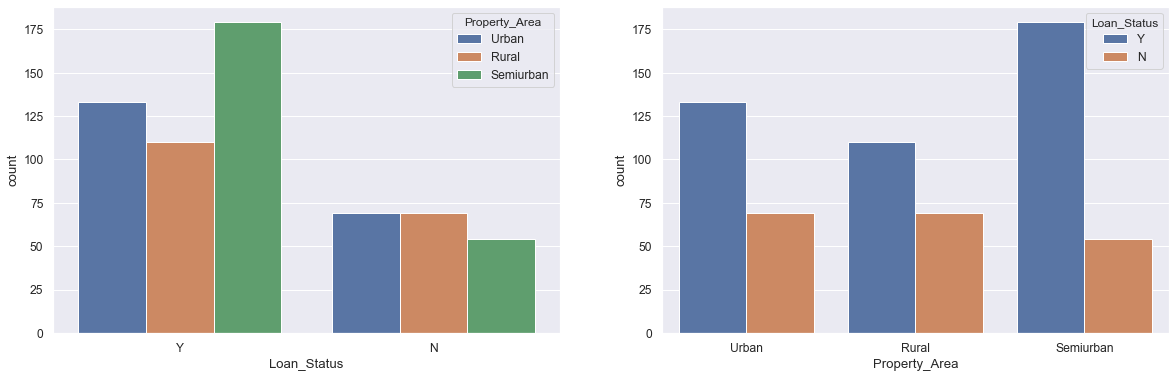

In [74]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(loan_data["Loan_Status"], hue=loan_data["Property_Area"], ax=ax[0])
sns.countplot(loan_data["Property_Area"], hue=loan_data["Loan_Status"], ax=ax[1])

In [98]:
loan_data.groupby("Property_Area")["Loan_Status"].value_counts(normalize=True)

Property_Area  Loan_Status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: Loan_Status, dtype: float64

## Additional EDA

#### Q> Does hight earning people ask for high amount loan ?

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

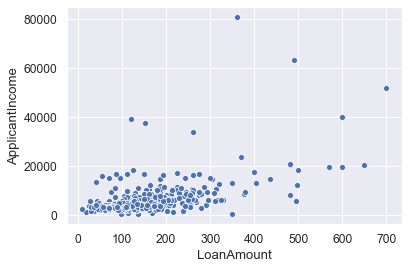

In [84]:
sns.scatterplot(loan_data["LoanAmount"], loan_data["ApplicantIncome"])

In [93]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#### Q> What is the relation between 'LoanAmount', 'ApplicantIncome' and 'LoanStatus' ?

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

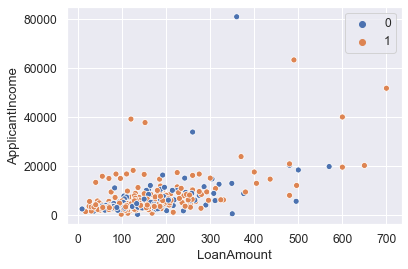

In [96]:
sns.scatterplot(loan_data["LoanAmount"], loan_data["ApplicantIncome"], hue=encoder.fit_transform(loan_data["Loan_Status"]))

#### Q> Relation between ApplicantIncome vs CoapplicantIncome ?

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

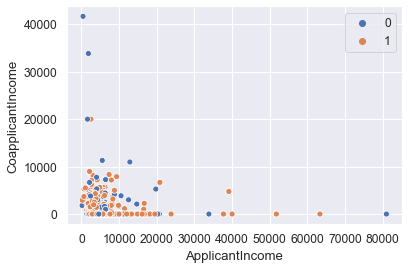

In [95]:
sns.scatterplot(loan_data["ApplicantIncome"], loan_data["CoapplicantIncome"], hue=encoder.fit_transform(loan_data["Loan_Status"]))